## Importando Arquivo

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

path = 'https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv'
data_base = pd.read_csv(path)

data_base[['Moeda', 'Valor_Imovel', 'Tipo_de_Contrato']] = data_base['Valor'].str.split(expand = True)
data_base_2 = data_base[data_base['Tipo_de_Contrato'].isnull()]
data_base_2['Valor_Imovel_float'] = data_base_2['Valor_Imovel'].str.replace('.', '').astype(float)
pd.set_option('display.precision', 2)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


## Aprendendo e Testando

In [ ]:
data_base_2.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_Imovel,Tipo_de_Contrato,Valor_Imovel_float
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None,7000000.00
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None,3700000.00
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None,380000.00
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None,685000.00
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None,540000.00


Calculando o valor do metro quadrado para cada imóvel.

In [ ]:
data_base_2['Valor_m2'] = data_base_2['Valor_Imovel_float'] / data_base_2['Metragem']
data_base_2['Valor_m2']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0       7000.00
1       7459.68
2       3040.00
3       2209.68
4       5400.00
          ...  
10002   5617.98
10003   7000.00
10004   3801.65
10005   5121.95
10007   2213.11
Name: Valor_m2, Length: 9156, dtype: float64

Agrupando por bairro e tirando a média.

In [ ]:
data_base_2.groupby(['Bairro']).mean()

,Metragem,Quartos,Banheiros,Vagas,Valor_Imovel_float,Valor_m2
Bairro,,,,,,
Aclimação,246.16,3.27,3.04,2.91,1763200.01,7656.17
Alto da Boa Vista,418.88,4.12,5.12,4.62,2391250.00,5849.57
Alto da Lapa,299.25,3.15,3.85,4.00,2083168.75,7606.73
Alto da Mooca,270.05,3.30,2.60,3.65,1184170.00,5691.74
Alto de Pinheiros,429.85,3.94,4.83,4.95,4782698.96,11269.98
...,...,...,...,...,...,...
Vila Água Funda,152.20,2.60,2.20,2.60,652000.00,4467.13
Água Branca,173.58,3.08,3.25,2.25,1226500.00,7269.11
Água Fria,165.42,2.83,3.42,2.50,927083.33,5841.10


Obtendo a soma dos valores agrupados pelo bairro.

In [ ]:
data_base_2.groupby(['Bairro']).sum()

,Metragem,Quartos,Banheiros,Vagas,Valor_Imovel_float,Valor_m2
Bairro,,,,,,
Aclimação,19447,258,240,230,139292801.00,604837.39
Alto da Boa Vista,3351,33,41,37,19130000.00,46796.55
Alto da Lapa,23940,252,308,320,166653500.00,608538.25
Alto da Mooca,5401,66,52,73,23683400.00,113834.80
Alto de Pinheiros,158616,1453,1782,1827,1764815915.00,4158622.61
...,...,...,...,...,...,...
Vila Água Funda,761,13,11,13,3260000.00,22335.64
Água Branca,2083,37,39,27,14718000.00,87229.37
Água Fria,1985,34,41,30,11125000.00,70093.25


Uma maneira mais correta para obter o valor do metro quadrado. Para isso, eu obtenho a soma de todos os valores de imóveis e de metragens de cada bairro e após isso eu divido as somas de valor pelas somas da metragem.

In [ ]:
district_value = data_base_2.groupby(['Bairro']).sum()
district_value['Valor_bairro_m2'] = district_value['Valor_Imovel_float'] / district_value['Metragem']
district_value

,Metragem,Quartos,Banheiros,Vagas,Valor_Imovel_float,Valor_m2,Valor_bairro_m2
Bairro,,,,,,,
Aclimação,19447,258,240,230,139292801.00,604837.39,7162.69
Alto da Boa Vista,3351,33,41,37,19130000.00,46796.55,5708.74
Alto da Lapa,23940,252,308,320,166653500.00,608538.25,6961.30
Alto da Mooca,5401,66,52,73,23683400.00,113834.80,4385.00
Alto de Pinheiros,158616,1453,1782,1827,1764815915.00,4158622.61,11126.34
...,...,...,...,...,...,...,...
Vila Água Funda,761,13,11,13,3260000.00,22335.64,4283.84
Água Branca,2083,37,39,27,14718000.00,87229.37,7065.77
Água Fria,1985,34,41,30,11125000.00,70093.25,5604.53


Obtenho todas as médias dos itens de Vila Mariana.

In [ ]:
data_base_2.groupby(['Bairro']).mean().loc['Vila Mariana']

Metragem                 231.24
Quartos                    3.39
Banheiros                  3.24
Vagas                      2.95
Valor_Imovel_float   1771159.76
Valor_m2                7913.15
Name: Vila Mariana, dtype: float64

Obtenho os 10 itens da coluna bairro que mais apareceram.

In [ ]:
data_base_2['Bairro'].value_counts()[:10].index

Index(['Alto de Pinheiros', 'Jardim Guedala', 'Jardim Paulista',
       'Brooklin Paulista', 'Jardim Europa', 'Pacaembu', 'Vila Madalena',
       'Cidade Jardim', 'Planalto Paulista', 'Jardim Leonor'],
      dtype='object')

Da soma dos agrupamentos por bairro, eu seleciono o bairro Vila Mariana.

In [ ]:
district_value.loc['Vila Mariana']

Metragem                 39079.00
Quartos                    573.00
Banheiros                  547.00
Vagas                      499.00
Valor_Imovel_float   299326000.00
Valor_m2               1337323.16
Valor_bairro_m2           7659.51
Name: Vila Mariana, dtype: float64

Obtenho o valor do metro quadrado em Vila Mariana.

In [ ]:
district_value.loc['Vila Mariana']['Valor_bairro_m2']

7659.510222881855

Obtenho o valor do metro quadrado em todos os bairros.

In [ ]:
district_value['Valor_bairro_m2']

Bairro
Aclimação            7162.69
Alto da Boa Vista    5708.74
Alto da Lapa         6961.30
Alto da Mooca        4385.00
Alto de Pinheiros   11126.34
                      ...   
Vila Água Funda      4283.84
Água Branca          7065.77
Água Fria            5604.53
Água Funda           3920.86
Água Rasa            3846.91
Name: Valor_bairro_m2, Length: 697, dtype: float64

Também obtenho o valor do metro quadrado em Vila Mariana, porém agora eu não preciso usar o loc.

In [ ]:
district_value['Valor_bairro_m2']['Vila Mariana']

7659.510222881855

Volto a organizar o Data Frame por índices, antes disso a coluna bairro estava atuando como uma especie de índice, o que acabava por limitar muitas das ações que poderiam ser realizadas. Agora, após os índices serem resetados, é como se ela voltasse a ser um Data Frame em si.

In [ ]:
district_value.reset_index(inplace = True)  # O inplace faz com que eu não precise dizer que a variável é igual ao novo valor (district_value = district_value.reset_index())
district_value

,Bairro,Metragem,Quartos,Banheiros,Vagas,Valor_Imovel_float,Valor_m2,Valor_bairro_m2
0,Aclimação,19447,258,240,230,139292801.00,604837.39,7162.69
1,Alto da Boa Vista,3351,33,41,37,19130000.00,46796.55,5708.74
2,Alto da Lapa,23940,252,308,320,166653500.00,608538.25,6961.30
3,Alto da Mooca,5401,66,52,73,23683400.00,113834.80,4385.00
4,Alto de Pinheiros,158616,1453,1782,1827,1764815915.00,4158622.61,11126.34
...,...,...,...,...,...,...,...,...
692,Vila Água Funda,761,13,11,13,3260000.00,22335.64,4283.84
693,Água Branca,2083,37,39,27,14718000.00,87229.37,7065.77
694,Água Fria,1985,34,41,30,11125000.00,70093.25,5604.53
695,Água Funda,278,6,5,4,1090000.00,7753.73,3920.86


Crio um gráfico de barras, porém como não filtrei quais bairros eu quero, acaba que todos os bairros aparecem.

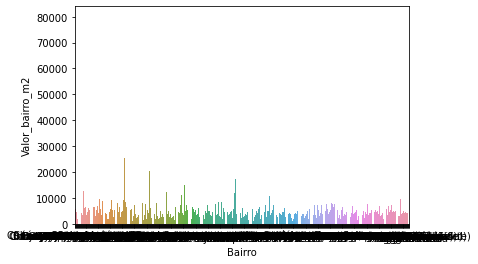

In [ ]:
barplot_1 = sns.barplot(data = district_value, x = 'Bairro', y = 'Valor_bairro_m2')
plt.show()

Dentre os bairros, eu organizo eles para deixar aqueles que possuem o maior valor valor do metro quadrado no topo, após isso, eu seleciono os 10 maiores.

In [ ]:
top_10_m2 = district_value.sort_values(by = ['Valor_bairro_m2'], ascending = False).head(10)
top_10_m2

,Bairro,Metragem,Quartos,Banheiros,Vagas,Valor_Imovel_float,Valor_m2,Valor_bairro_m2
527,Vila Guaca,10,3,2,2,800000.00,80000.00,80000.00
103,Jardim América,76911,481,605,848,1954884000.00,2866540.12,25417.48
277,Jardim Teresa,1945,15,18,18,44510000.00,52396.69,22884.32
155,Jardim Europa,118898,795,993,1056,2414172900.00,4192164.45,20304.57
597,Vila Nova Conceição,27837,277,314,301,489265000.00,1638105.15,17576.07
334,Morro dos Ingleses,1400,12,10,26,24300000.00,35247.09,17357.14
192,Jardim Luzitânia,43422,307,427,376,736485000.00,1441482.10,16961.10
227,Jardim Paulista,130283,1028,1231,1171,2136081000.00,4279262.19,16395.70
228,Jardim Paulistano,51468,494,541,529,767570001.00,2009338.16,14913.54
421,São Judas,1334,15,17,18,19862000.00,41067.17,14889.06


Bairros com os maiores valores de m2:

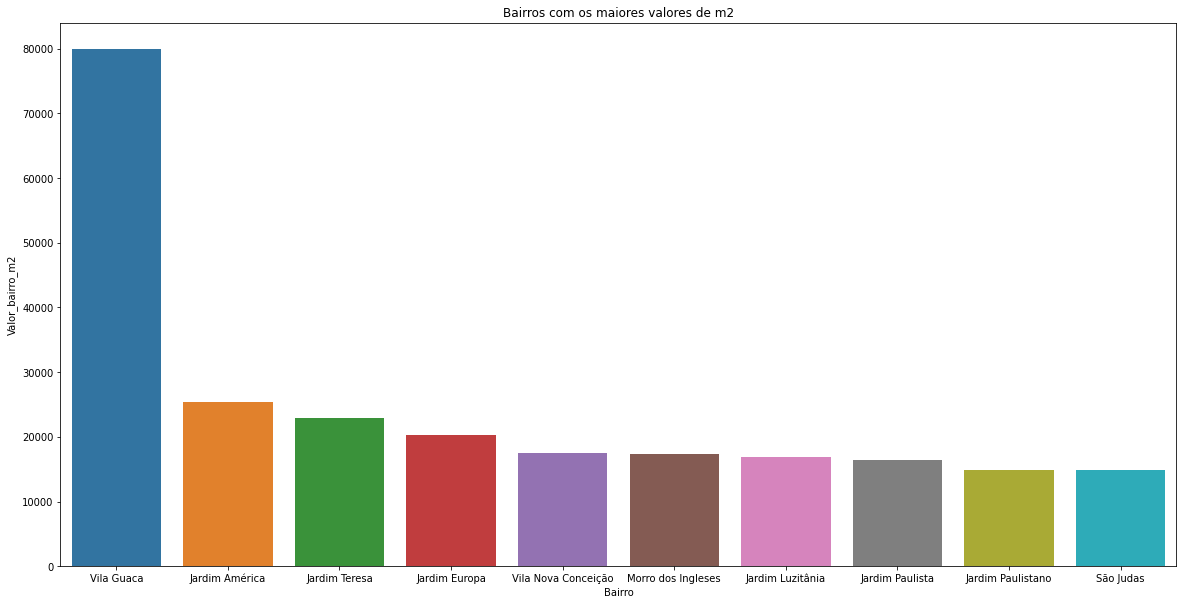

In [ ]:
plt.figure(figsize = (20, 10))
barplot_2 = sns.barplot(data = top_10_m2, x = 'Bairro', y = 'Valor_bairro_m2')
barplot_2.set_title('Bairros com os maiores valores de m2')
plt.show()

Valor do m2 nos bairros que mais aparecem:

Seleciono os 10 bairros que mais aparecem na base de dados original.

In [ ]:
top_10_district = data_base_2['Bairro'].value_counts()[:10].index
top_10_district

Index(['Alto de Pinheiros', 'Jardim Guedala', 'Jardim Paulista',
       'Brooklin Paulista', 'Jardim Europa', 'Pacaembu', 'Vila Madalena',
       'Cidade Jardim', 'Planalto Paulista', 'Jardim Leonor'],
      dtype='object')

In [ ]:
district_value

,Bairro,Metragem,Quartos,Banheiros,Vagas,Valor_Imovel_float,Valor_m2,Valor_bairro_m2
0,Aclimação,19447,258,240,230,139292801.00,604837.39,7162.69
1,Alto da Boa Vista,3351,33,41,37,19130000.00,46796.55,5708.74
2,Alto da Lapa,23940,252,308,320,166653500.00,608538.25,6961.30
3,Alto da Mooca,5401,66,52,73,23683400.00,113834.80,4385.00
4,Alto de Pinheiros,158616,1453,1782,1827,1764815915.00,4158622.61,11126.34
...,...,...,...,...,...,...,...,...
692,Vila Água Funda,761,13,11,13,3260000.00,22335.64,4283.84
693,Água Branca,2083,37,39,27,14718000.00,87229.37,7065.77
694,Água Fria,1985,34,41,30,11125000.00,70093.25,5604.53
695,Água Funda,278,6,5,4,1090000.00,7753.73,3920.86


Na variável com a soma de todos os valores dos bairros, eu seleciono apenas os bairros que mais aparessem.

In [ ]:
top_10_district_value = district_value.query('Bairro in @top_10_district')
top_10_district_value

,Bairro,Metragem,Quartos,Banheiros,Vagas,Valor_Imovel_float,Valor_m2,Valor_bairro_m2
4,Alto de Pinheiros,158616,1453,1782,1827,1764815915.00,4158622.61,11126.34
19,Brooklin Paulista,70002,778,862,832,475796789.00,1627341.87,6796.90
57,Cidade Jardim,132220,789,1008,1172,1164210900.00,1635692.98,8805.10
155,Jardim Europa,118898,795,993,1056,2414172900.00,4192164.45,20304.57
168,Jardim Guedala,972212,1443,2027,2161,1801165587.00,2833882.79,1852.65
187,Jardim Leonor,97141,697,941,902,646326369.00,1115858.80,6653.49
227,Jardim Paulista,130283,1028,1231,1171,2136081000.00,4279262.19,16395.70
338,Pacaembu,100285,774,889,1028,867956500.00,1753672.28,8654.90
396,Planalto Paulista,59250,636,768,713,374907000.00,1186380.95,6327.54
564,Vila Madalena,66250,739,786,712,583253030.00,1792770.40,8803.82


Crio um gráfico de barras com o 10 bairros que mais aparessem.

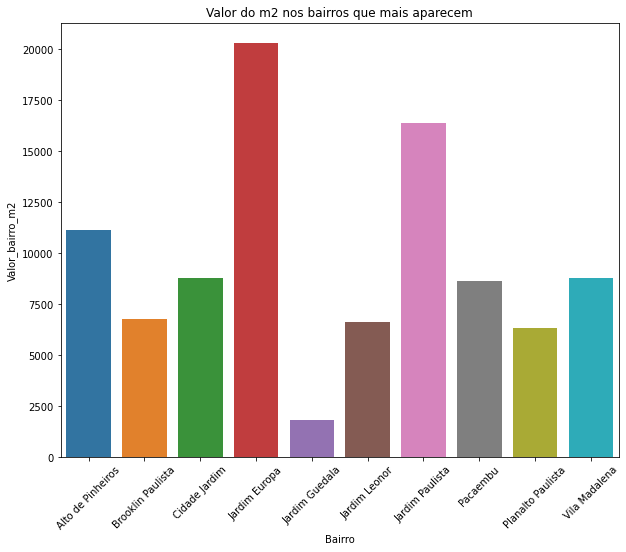

In [ ]:
plt.figure(figsize = (10, 8))
barplot_3 = sns.barplot(data = top_10_district_value, x = 'Bairro', y = 'Valor_bairro_m2')
barplot_3.set_title('Valor do m2 nos bairros que mais aparecem')
barplot_3.tick_params(axis = 'x', rotation = 45)
plt.show()

Boxplots:

Crio um box plot do valor do imóvel nos 10 bairros que mais aparessem. Lembrando que a consulta é feita na base de dados original para selecionar todos os casos que ocorrem em cada um dos bairros do top 10.

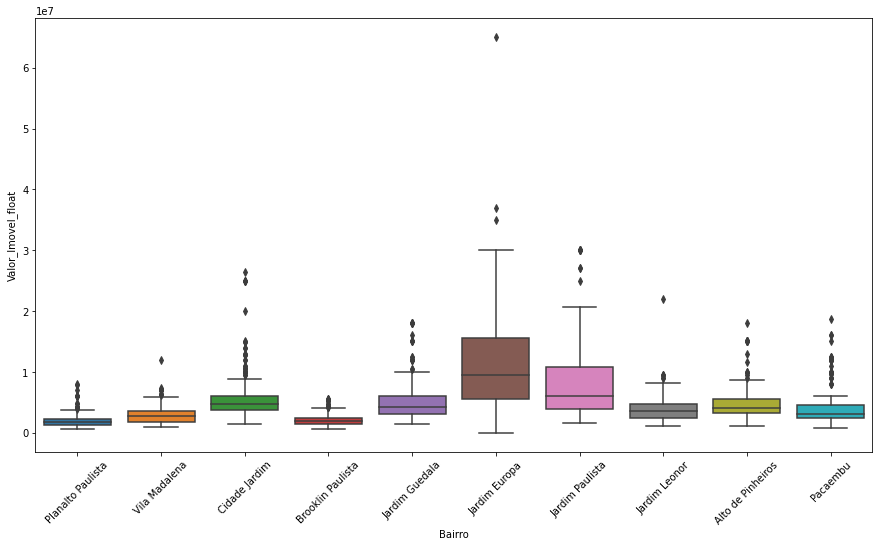

In [ ]:
plt.figure(figsize = (15, 8))
boxplot_1 = sns.boxplot(data = data_base_2.query('Bairro in @top_10_district'), x = 'Bairro', y = 'Valor_Imovel_float')
boxplot_1.tick_params(axis = 'x', rotation = 45)
plt.show()

Crio um box plot que associa o bairro com a metragem, sendo que essa metragem precisa ser inferior a 30000 metros.

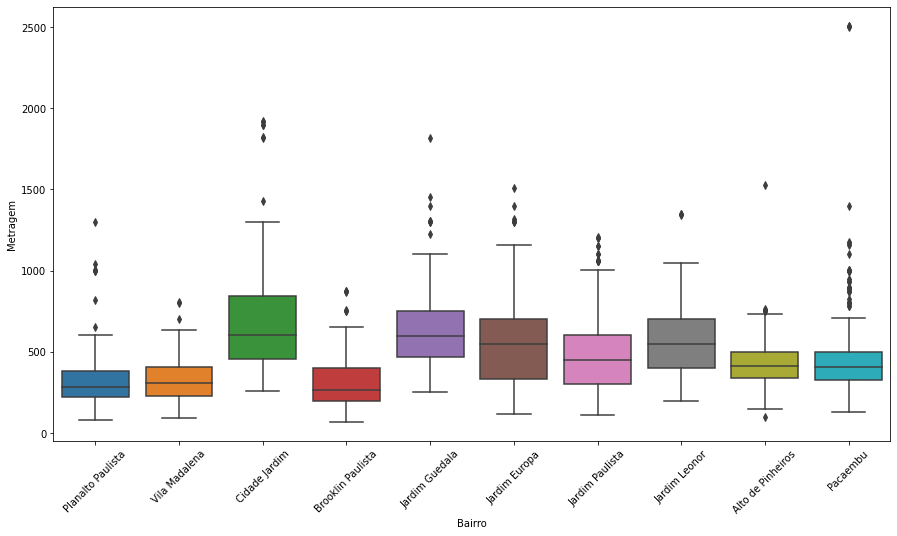

In [ ]:
plt.figure(figsize = (15, 8))
boxplot_2 = sns.boxplot(data = data_base_2.query('Bairro in @top_10_district & Metragem < 30000'), x = 'Bairro', y = 'Metragem')
boxplot_2.tick_params(axis = 'x', rotation = 45)
plt.show()

Dados do IBGE de forma completamente desorganizada.

In [ ]:
url_ibge = 'https://gist.githubusercontent.com/tgcsantos/85f8c7b0a2edbc3e27fcad619b37d886/raw/a4954781e6bca9cb804062a3eea0b3b84679daf4/Basico_SP1.csv'
ibge_data = pd.read_csv(url_ibge)
ibge_data

## Desafios 🧐🤯😎:

- Tentar vincular dados do IBGE com os dados de imóveis
- Tratar os outliers e comparar com os resultados
- Agrupar por mais de uma categoria e realizar as análises
- Orgaize o colab para deixar com cara de projeto

#### Desafio 1: Tentar vincular dados do IBGE com os dados de imóveis.

#### Desafio 2: Tratar os outliers e comparar com os resultados.

#### Desafio 3: Agrupar por mais de uma categoria e realizar as análises.

#### Desafio 4: Orgaize o colab para deixar com cara de projeto.